In [66]:
# Removing row with NaN value in Details column
import pandas as pd

# Read the CSV file using a relative path
data = pd.read_csv('../Dataset/data1.2.csv')

data_cleaned = data.dropna(subset=['Details'])

# Sort the DataFrame by the 'Place' column
data_cleaned_sorted = data_cleaned.sort_values(by='Place', ascending=True)

# Save the 
#  DataFrame to a new CSV file
data_cleaned_sorted.to_csv('data1.3.csv', index=False)

# Display the first 2 rows of the sorted DataFrame
data_cleaned_sorted.head(3)

,Place,Details,Class,WordCount
427,25th of April Bridge,"On April 25, the bridge spanned both sides of ...",None Related,183
236,3D Black Art,Myeongdong 3D Art Museum uses ultra-realistic ...,None Related,181
721,3billion,Company that offers genetic testing for rare d...,Biotechnology,20


# From data1.3.csv
## Clean data using NLTK
#

In [67]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

# Download NLTK resources (run only once)
# nltk.download('stopwords')
# nltk.download('punkt')


In [68]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Load NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

data = pd.read_csv('data1.3.csv')

# Preprocess the 'Details' column
stop_words = set(nltk.corpus.stopwords.words('english'))

# Add custom stop words
custom_stop_words = {'also', 'located', 'many', 'one', 'see', 'built', 'african', 'africa', 'people', 'take'}
stop_words.update(custom_stop_words)

# Function for cleaning text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words and numbers
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the clean_text function to the 'Details' column
data['Details'] = data['Details'].apply(clean_text)

# Display the cleaned DataFrame
print(data)


[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                    Place                                            Details  \
0    25th of April Bridge  april bridge spanned sides tejo river connecti...   
1            3D Black Art  myeongdong art museum uses dislocation paintin...   
2                3billion  company offers genetic testing rare diseases m...   
3             63 Building  city skyscraper seoul yeouido island overlooki...   
4                     ABB  abb portfolio robotics products serves several...   
..                    ...                                                ...   
743             ZOIC LABS  zoic labs exists intersection data narrative d...   
744                iRobot  irobot uses ai engineering home robots like ro...   
745              old nice  today old town nice still maintains appearance...   
746                   Èze  small town eze nice monaco medieval town cliff...   
747         Île aux Cerfs  kashima small island eastern coast mauritius b...   

             Class  WordCount  
0     N

In [69]:
# Apply the cleaning function to the 'Details' column
data['Cleaned_Details'] = data['Details'].apply(clean_text)
data.head(15)


,Place,Details,Class,WordCount,Cleaned_Details
0,25th of April Bridge,april bridge spanned sides tejo river connecti...,None Related,183,april bridge spanned sides tejo river connecti...
1,3D Black Art,myeongdong art museum uses dislocation paintin...,None Related,181,myeongdong art museum uses dislocation paintin...
2,3billion,company offers genetic testing rare diseases m...,Biotechnology,20,company offers genetic testing rare diseases m...
3,63 Building,city skyscraper seoul yeouido island overlooki...,None Related,106,city skyscraper seoul yeouido island overlooki...
4,ABB,abb portfolio robotics products serves several...,Robotic,36,abb portfolio robotics products serves several...
5,ACEINNA,aceinna mems sensor sensing solution company f...,Robotic,23,aceinna mems sensor sensing solution company f...
6,AI SpaceFactory,focused creating groundbreaking technology fac...,Aerospace,54,focused creating groundbreaking technology fac...
7,AJ Hackett Kawarau Bungy Centre,bungee jumping insanely exciting jumping activ...,None Related,96,bungee jumping insanely exciting jumping activ...
8,AMP Robotics,puts ai work automate recycling ai platform po...,Robotic,31,puts ai work automate recycling ai platform po...
9,ARGUS International,provides variety aviation safety software serv...,Aerospace,60,provides variety aviation safety software serv...


In [70]:
# Display the updated DataFrame
data.to_csv('data1.4.csv')
data.head(3)

,Place,Details,Class,WordCount,Cleaned_Details
0,25th of April Bridge,april bridge spanned sides tejo river connecti...,None Related,183,april bridge spanned sides tejo river connecti...
1,3D Black Art,myeongdong art museum uses dislocation paintin...,None Related,181,myeongdong art museum uses dislocation paintin...
2,3billion,company offers genetic testing rare diseases m...,Biotechnology,20,company offers genetic testing rare diseases m...


# From data1.4.csv
## Read Place and Cleaned_details()
#

In [71]:
import pandas as pd

data = pd.read_csv('data1.4.csv')
column_to_read = ['Place', 'Cleaned_Details', 'Class', 'WordCount']
selected = data[column_to_read].copy()
selected.rename(columns={'Cleaned_Details': "Details"}, inplace=True)
# selected.to_csv('data1.5.csv', index=False)
print(selected.head(5))

                  Place                                            Details  \
0  25th of April Bridge  april bridge spanned sides tejo river connecti...   
1          3D Black Art  myeongdong art museum uses dislocation paintin...   
2              3billion  company offers genetic testing rare diseases m...   
3           63 Building  city skyscraper seoul yeouido island overlooki...   
4                   ABB  abb portfolio robotics products serves several...   

           Class  WordCount  
0   None Related        183  
1   None Related        181  
2  Biotechnology         20  
3   None Related        106  
4        Robotic         36  


# data1.5.csv
## Tokenize Details
#

In [72]:
import nltk
from nltk.tokenize import word_tokenize

# Sample DataFrame
# data = pd.read_csv('data1.5.csv')
column_to_read = ['Place', 'Details', 'Class', 'WordCount']
selected = selected[column_to_read].copy()

# Tokenize the 'Details' column
selected['Tokenized_Details'] = selected['Details'].apply(word_tokenize)

# Display the DataFrame with tokenized details
print(selected[['Place', 'Tokenized_Details','Class', 'WordCount']].head(3))

# selected.to_csv('data1.6.csv')


                  Place                                  Tokenized_Details  \
0  25th of April Bridge  [april, bridge, spanned, sides, tejo, river, c...   
1          3D Black Art  [myeongdong, art, museum, uses, dislocation, p...   
2              3billion  [company, offers, genetic, testing, rare, dise...   

           Class  WordCount  
0   None Related        183  
1   None Related        181  
2  Biotechnology         20  


# data1.6.csv
## Read Place and Tokenized_details()
#

In [73]:
column_to_read = ['Place', 'Tokenized_Details', 'Class', 'WordCount']

# Assuming 'selected' is your original DataFrame
selected = selected[column_to_read].copy()

# Rename 'Tokenized_Details' to 'Details'
selected.rename(columns={'Tokenized_Details': 'Details'}, inplace=True)

# Save the DataFrame to a new CSV file
selected.to_csv('data1.7.csv', index=False)

# Display the first 3 rows of the updated DataFrame
selected.head(3)


,Place,Details,Class,WordCount
0,25th of April Bridge,"[april, bridge, spanned, sides, tejo, river, c...",None Related,183
1,3D Black Art,"[myeongdong, art, museum, uses, dislocation, p...",None Related,181
2,3billion,"[company, offers, genetic, testing, rare, dise...",Biotechnology,20


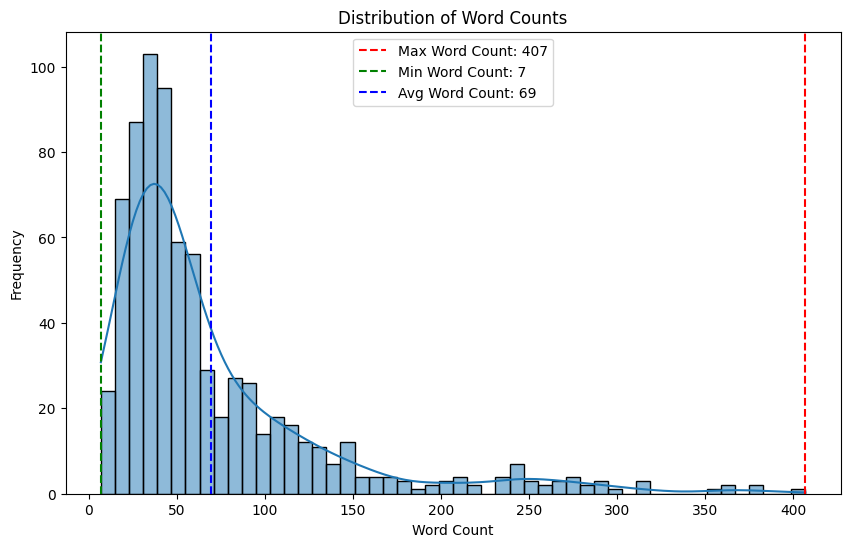

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Details' column contains lists
selected['WordCount'] = selected['Details'].apply(lambda x: len(' '.join(x).split()))

# Calculate max, min, and average word counts
max_word_count = selected['WordCount'].max()
min_word_count = selected['WordCount'].min()
avg_word_count = selected['WordCount'].mean()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(selected['WordCount'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Add vertical lines to indicate max, min, and average word counts
plt.axvline(x=max_word_count, color='red', linestyle='--', label=f'Max Word Count: {max_word_count}')
plt.axvline(x=min_word_count, color='green', linestyle='--', label=f'Min Word Count: {min_word_count}')
plt.axvline(x=avg_word_count, color='blue', linestyle='--', label=f'Avg Word Count: {avg_word_count:.0f}')

# Show legend
plt.legend()

# Save the plot as an image (PNG format)
plt.savefig('word_count_distribution.png')

# Show the plot
plt.show()


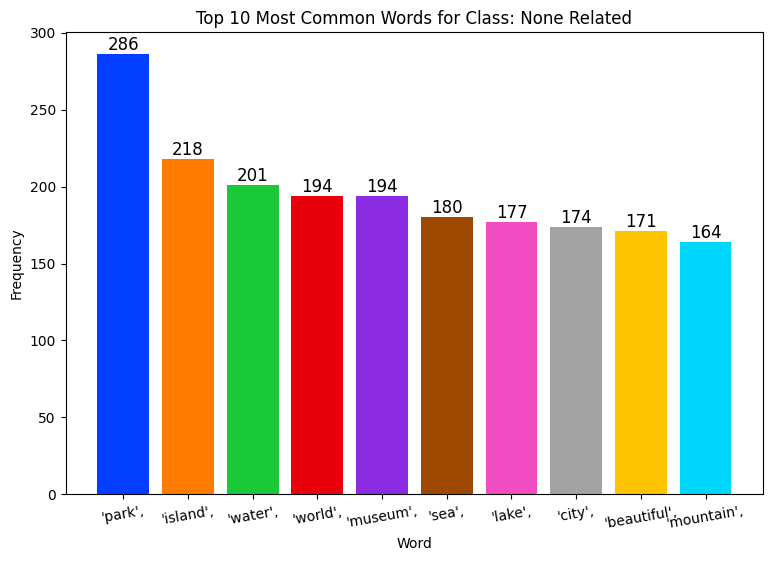

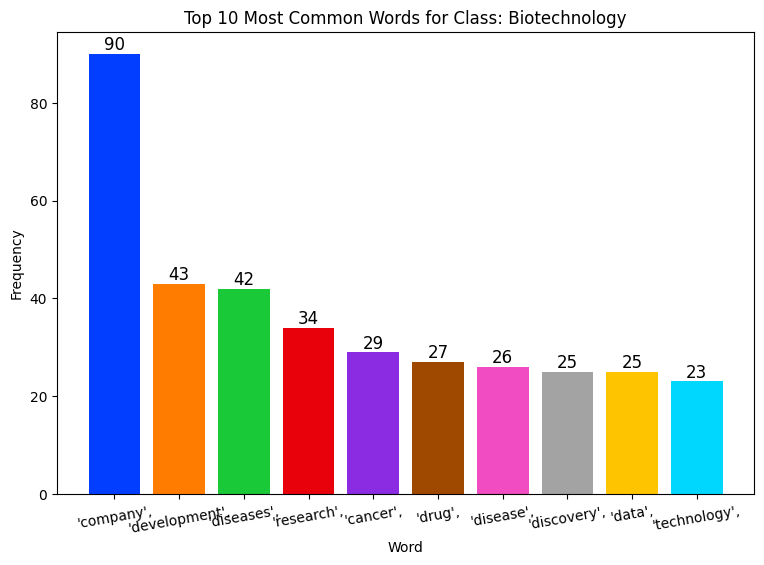

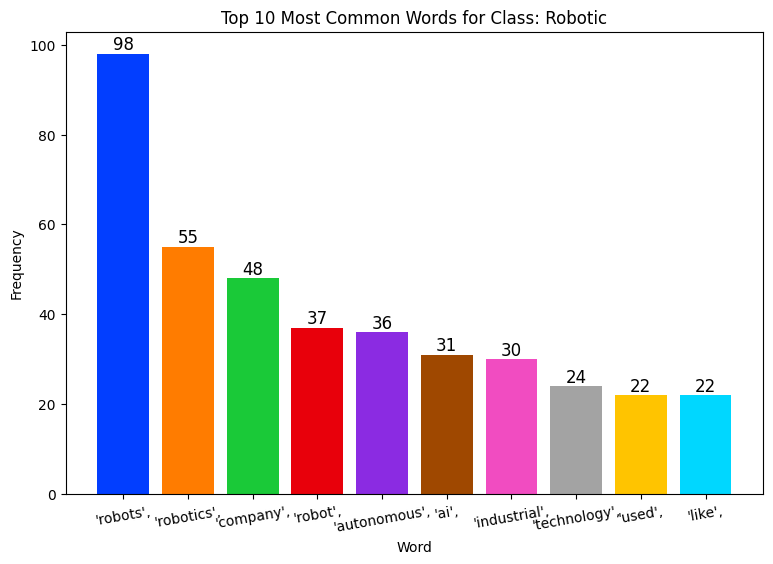

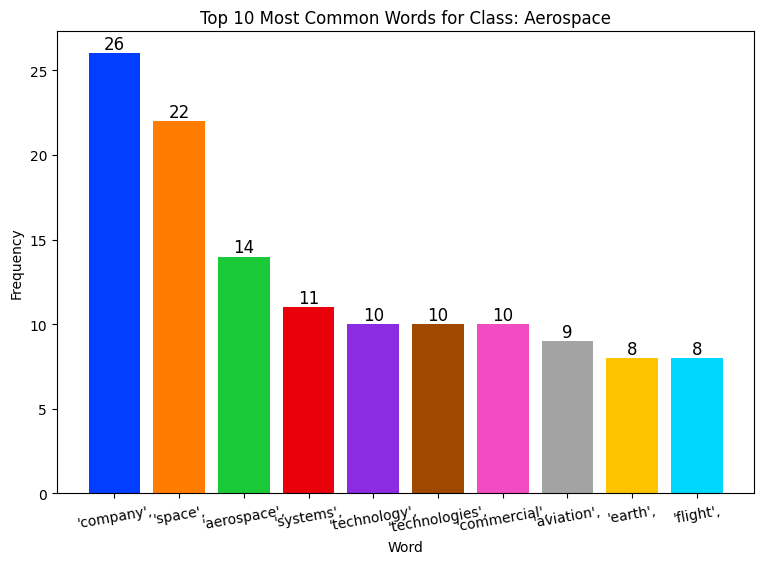

In [82]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your data and spaCy model
data = pd.read_csv('data1.7.csv')
nlp = spacy.load("en_core_web_sm")

# Concatenate 'Place' and 'Details' columns
column_to_read = data['Details']

# Apply SpaCy pipeline to each text in the column
docs = column_to_read.apply(nlp)

# Calculate word counts
data['Word_Count'] = docs.apply(lambda doc: len(doc))

# Get unique values from the 'Class' column
unique_classes = data['Class'].unique()

# Iterate over unique classes and create bar charts
for class_value in unique_classes:
    # Filter data for the specific class
    class_data = data[data['Class'] == class_value]
    
    # Most Common Words for the current class
    all_words = ' '.join(class_data['Details']).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(10)
    
    # Get a list of bright colors from Seaborn
    bright_colors = sns.color_palette("bright", n_colors=len(most_common_words))
    
    # Plot for the current class
    plt.figure(figsize=(9, 6))
    bars = plt.bar(*zip(*most_common_words), color=bright_colors)
    plt.title(f'Top 10 Most Common Words for Class: {class_value}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=10)
    
    # Annotate each bar with its count
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                 ha='center', va='bottom', fontsize=12, color='black')
    
    # Disable the grid
    plt.grid(False)
    
    # Save the plot as an image (PNG format) with a transparent background
    plt.savefig(f'most_common_words_class_{class_value}.png')
    plt.show()


In [76]:
# Rank Entity Locations
entity_locations = []
for doc in docs:
    entity_locations.extend([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

ranked_locations = Counter(entity_locations).most_common()
print("Ranked Entity Locations:")
for location, count in ranked_locations:
    print(f"{location}: {count} times")

Ranked Entity Locations:
paris: 95 times
tokyo: 35 times
france: 30 times
malaysia: 28 times
japan: 23 times
china: 19 times
egypt: 16 times
brazil: 9 times
cairo: 9 times
india: 8 times
jakarta: 7 times
rome: 7 times
wellington: 6 times
morocco: 5 times
kenya: 4 times
pathai: 3 times
boston: 3 times
germany: 2 times
poland: 2 times
colorado: 2 times
italy: 2 times
california: 2 times
cheguri: 2 times
hemophilia: 1 times
virginia: 1 times
denver: 1 times
namibia: 1 times
pakistan: 1 times
anesthesia: 1 times
london: 1 times
singapore: 1 times
neurala: 1 times
florida: 1 times
spain: 1 times
cambodia: 1 times
berisha: 1 times
wisteria: 1 times
holland: 1 times
netherlands: 1 times
orlando: 1 times


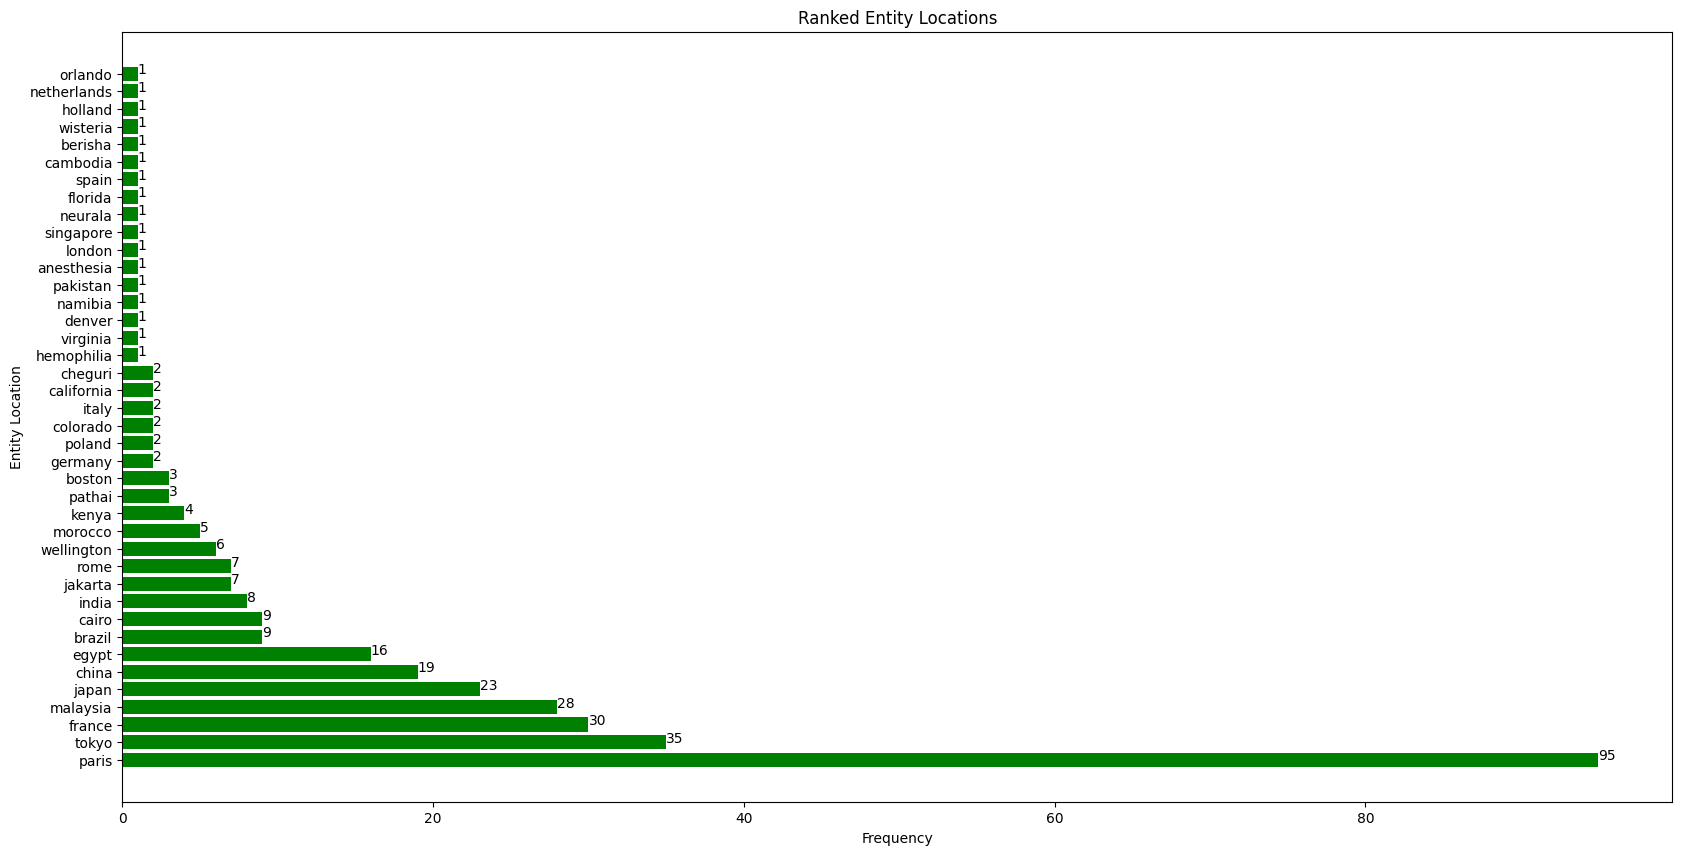

In [77]:
import matplotlib.pyplot as plt 
from collections import Counter



# Rank Entity Locations
plt.figure(figsize=(20, 10))
locations, counts = zip(*ranked_locations)
plt.barh(locations, counts, color='green')
plt.title('Ranked Entity Locations')
plt.xlabel('Frequency')
plt.ylabel('Entity Location')
# Disable the grid
plt.grid(False)
# Add frequency values to each bar
for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.show()



In [78]:
import os
import pickle

# Assuming you have a variable named 'ranked_locations' with the data you want to save

# Save data separately
with open("ranked_locations.pkl", "wb") as f:
    pickle.dump(ranked_locations, f)


In [79]:
import spacy
import pandas as pd
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming you have already loaded your data
data = pd.read_csv('data1.3.csv')

# Extract 'Details' column
column_to_read = data['Details']

# Apply SpaCy pipeline to each text in the 'Details' column
docs = column_to_read.apply(nlp)

# Named Entity Recognition for Organization and Location
organization_entities = []
location_entities = []

for doc in docs:
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            organization_entities.append(ent.text)
        elif ent.label_ == 'LOC' or ent.label_ == 'GPE':
            location_entities.append(ent.text)

# Display the most common Organization entities
most_common_organizations = Counter(organization_entities).most_common(15)
print("\nMost Common Organizations:")
for org, count in most_common_organizations:
    print(f"{org}: {count} times")

# Display the most common Location entities
most_common_locations = Counter(location_entities).most_common(10)
print("\nMost Common Locations:")
for loc, count in most_common_locations:
    print(f"{loc}: {count} times")


Most Common Organizations:
AI: 32 times
BC: 16 times
Gothic: 15 times
Baroque: 11 times
greenery: 8 times
RNA: 7 times
Renaissance: 7 times
Evian: 7 times
the China Pavilion: 7 times
Rotorua: 7 times
Amazon: 6 times
the Arc de Triomphe: 6 times
Mauritius: 6 times
World Heritage Site: 6 times
The Temple of Zeus: 6 times

Most Common Locations:
Paris: 74 times
Seoul: 44 times
Lisbon: 43 times
Bali: 36 times
France: 27 times
New Zealand: 26 times
Malaysia: 26 times
Tokyo: 25 times
Korea: 24 times
Portugal: 23 times


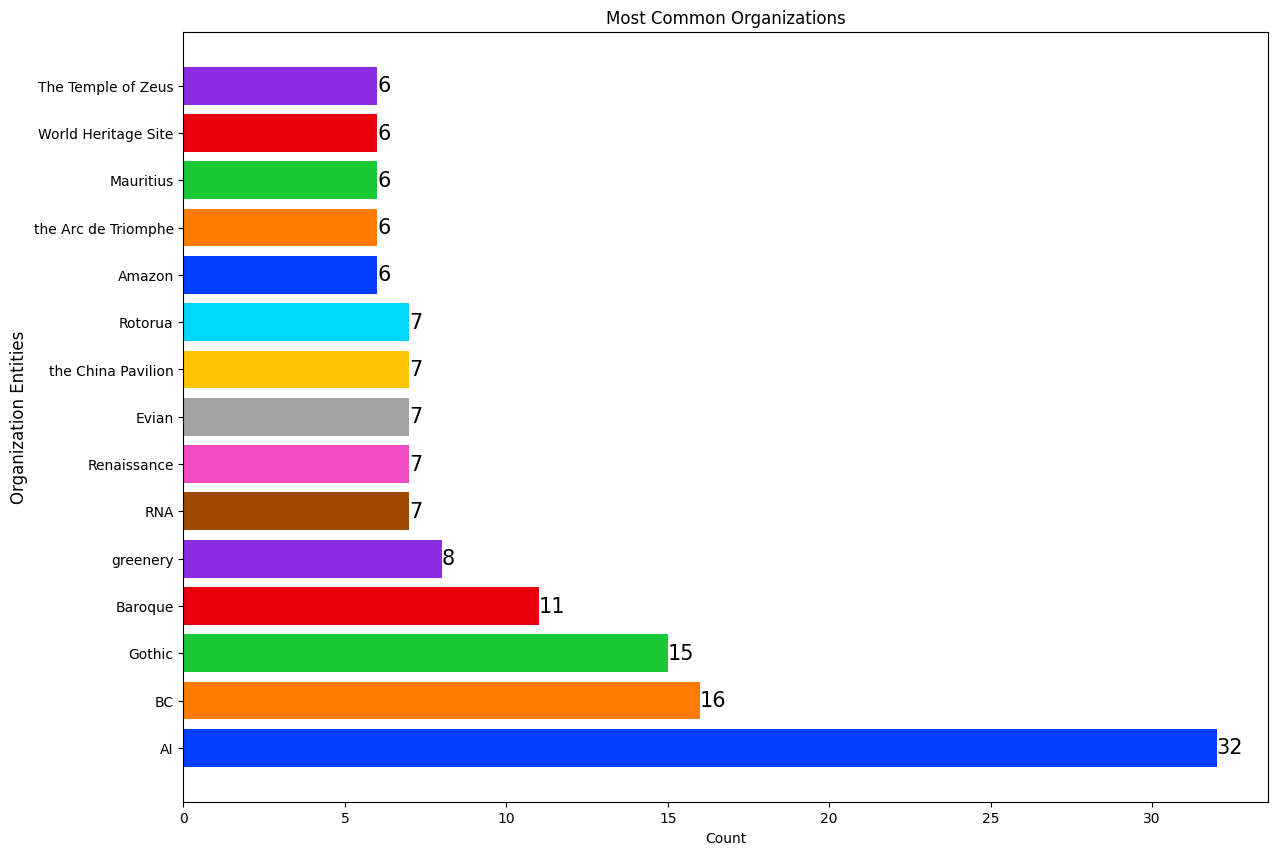

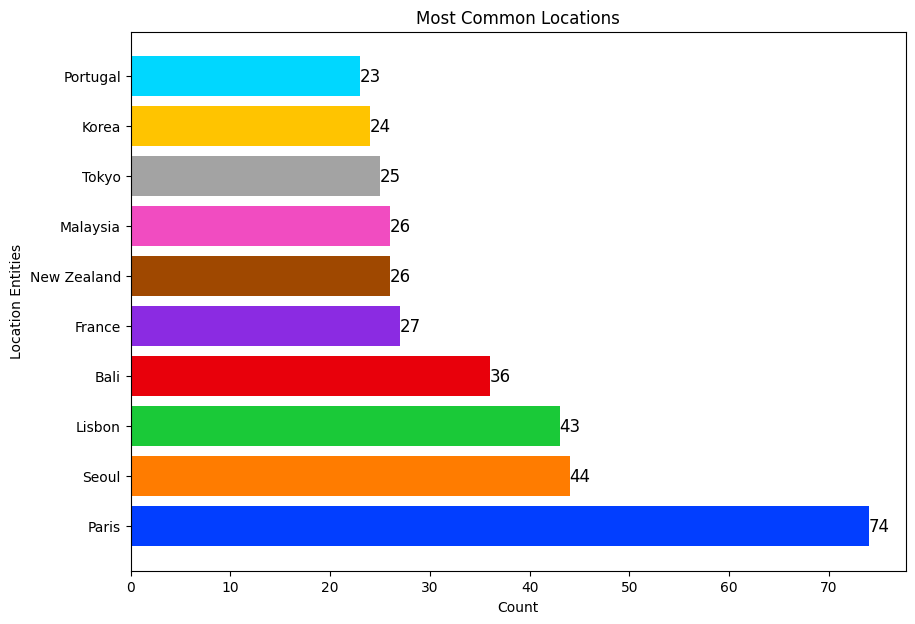

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of bright colors from Seaborn
bright_colors = sns.color_palette("bright", n_colors=len(most_common_organizations))

plt.figure(figsize=(14, 10))
bars = plt.barh([org[0] for org in most_common_organizations], [count[1] for count in most_common_organizations], color=bright_colors)
plt.xlabel('Count')
plt.ylabel('Organization Entities', fontsize=12)
plt.title('Most Common Organizations')

# Annotate each bar with its count and use a smaller font size for organizations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=15, color='black')
# Disable the grid
plt.grid(False)
# Save the plot as an image (PNG format)
plt.savefig('most_common_organizations.png')
plt.show()


plt.figure(figsize=(10, 7))
bars = plt.barh([loc[0] for loc in most_common_locations], [count[1] for count in most_common_locations], color=bright_colors[:len(most_common_locations)])
plt.xlabel('Count')
plt.ylabel('Location Entities')
plt.title('Most Common Locations')

# Annotate each bar with its count
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=12, color='black')
# Disable the grid
plt.grid(False)
# Save the plot as an image (PNG format)
plt.savefig('most_common_locations.png')
plt.show()


In [81]:
import spacy
import pandas as pd
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming you have already loaded your data
data = pd.read_csv('data1.3.csv')

# Extract 'Details' column
column_to_read = data['Details']

# Initialize lists to store organization and location entities for each row
all_organization_entities = []
all_location_entities = []

# Iterate through each row in the 'Details' column
for index, row in data.iterrows():
    doc = nlp(row['Details'])

    # Named Entity Recognition for Organization and Location in each row
    organization_entities = set()  # Use a set to store unique entities
    location_entities = set()

    for ent in doc.ents:
        if ent.label_ == 'ORG':
            organization_entities.add(ent.text)
        elif ent.label_ == 'LOC' or ent.label_ == 'GPE':
            location_entities.add(ent.text)

    # Append organization and location entities for the current row to the lists
    all_organization_entities.append(organization_entities)
    all_location_entities.append(location_entities)

# Create a DataFrame to display organization and location entities for each row
result_df = pd.DataFrame({
    'Place': data['Place'],
    'Details': data['Details'],
    'Class': data['Class'],
    'WordCount': data['WordCount'],
    'Organization Entities': all_organization_entities,
    'Location Entities': all_location_entities
})

# Convert lists to strings without square brackets for 'Organization Entities' and 'Location Entities'
result_df['Organization Entities'] = result_df['Organization Entities'].apply(lambda x: ', '.join(map(str, x)))
result_df['Location Entities'] = result_df['Location Entities'].apply(lambda x: ', '.join(map(str, x)))

# Display the DataFrame
result_df 

,Place,Details,Class,WordCount,Organization Entities,Location Entities
0,25th of April Bridge,"On April 25, the bridge spanned both sides of ...",None Related,183,Almada,"the Tejo River, Lisbon, the United States"
1,3D Black Art,Myeongdong 3D Art Museum uses ultra-realistic ...,None Related,181,"3D Art Museum, the Luminous Museum, The 3D Lum...",Myeongdong
2,3billion,Company that offers genetic testing for rare d...,Biotechnology,20,,
3,63 Building,63 City is a skyscraper on Seoul's Yeouido Isl...,None Related,106,Incheon,"Yeouido Island, the Han River, 63 City, Seoul"
4,ABB,ABB’s portfolio of robotics products serves se...,Robotic,36,"healthcare, ABB, RobotStudio",
...,...,...,...,...,...,...
743,ZOIC LABS,"Zoic Labs exists at the intersection of data, ...",Aerospace,66,"AIS, Zoic Studios",
744,iRobot,iRobot uses AI in engineering home robots like...,Robotic,55,"Braava, AI, Roomba, iRobot",
745,old nice,"Today, the old town of Nice still maintains th...",None Related,138,Nice Opera House,"the Roman Empire, Nice, Sarea"
746,Èze,"The small town of Eze, located between Nice an...",None Related,96,,"the Mediterranean Sea, Nice, Monaco"
